<a href="https://colab.research.google.com/github/Cristian2820/Senales-y-sistemas/blob/main/SerieFourierEj_Trigo_Compacta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Presente una simulación relacionada con la proyección lineal de $\mathbf{a}\in\mathbb{R}^2$ sobre $\mathbf{b}\in\mathbb{R}^2$. El código debe permitir al usuario ingresar las componentes de los dos vectores, calcular el factor de escala de la proyección y graficar los vectores de entrada y el proyectado (usar la función [pyplot.arrow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html)).**

Ingrese las componentes del vector a (x1, y1):
x1: 1
y1: 1
Ingrese las componentes del vector b (x2, y2):
x2: 2
y2: 3
La proyección de a sobre b es: [0.76923077 1.15384615]


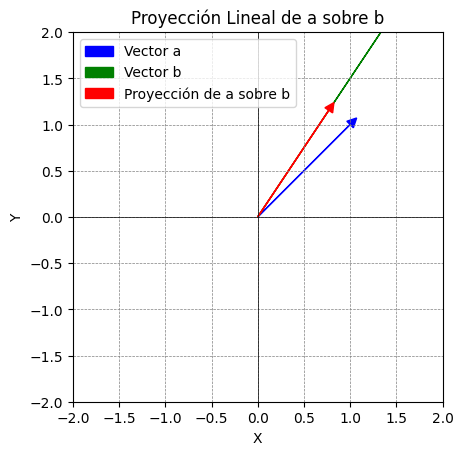

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def proyectar_vector(a, b):
    """ Calcula la proyección de a sobre b. """
    b_norm = np.linalg.norm(b)
    if b_norm == 0:
        raise ValueError("El vector b no puede ser el vector cero.")
    factor_escala = np.dot(a, b) / (b_norm ** 2)
    proyeccion = factor_escala * b
    return proyeccion

def graficar_vectores(a, b, proyeccion):
    """ Grafica los vectores a, b y la proyección de a sobre b. """
    plt.figure()
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

    plt.arrow(0, 0, a[0], a[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='Vector a')
    plt.arrow(0, 0, b[0], b[1], head_width=0.1, head_length=0.1, fc='green', ec='green', label='Vector b')
    plt.arrow(0, 0, proyeccion[0], proyeccion[1], head_width=0.1, head_length=0.1, fc='red', ec='red', label='Proyección de a sobre b')

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Proyección Lineal de a sobre b')
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def main():
    print("Ingrese las componentes del vector a (x1, y1):")
    a_x = float(input("x1: "))
    a_y = float(input("y1: "))
    a = np.array([a_x, a_y])

    print("Ingrese las componentes del vector b (x2, y2):")
    b_x = float(input("x2: "))
    b_y = float(input("y2: "))
    b = np.array([b_x, b_y])

    proyeccion = proyectar_vector(a, b)
    print(f"La proyección de a sobre b es: {proyeccion}")

    graficar_vectores(a, b, proyeccion)

if __name__ == "__main__":
    main()

**Encontrar la representación por serie exponencial de Fourier de la señal $x(t) = A {\rm{rect}}_{\tau/2}(t)$, con $t\in [-\tau/2,\tau/2]$. Graficar el espectro, la fase del espectro, la reconstrucción para $n\in\{0,\pm1,\pm2,\dots\}$, y determinar el valor del error relativo para cada valor de $n$. Utilice el ambiente animación de Python para mostrar los resultados.**

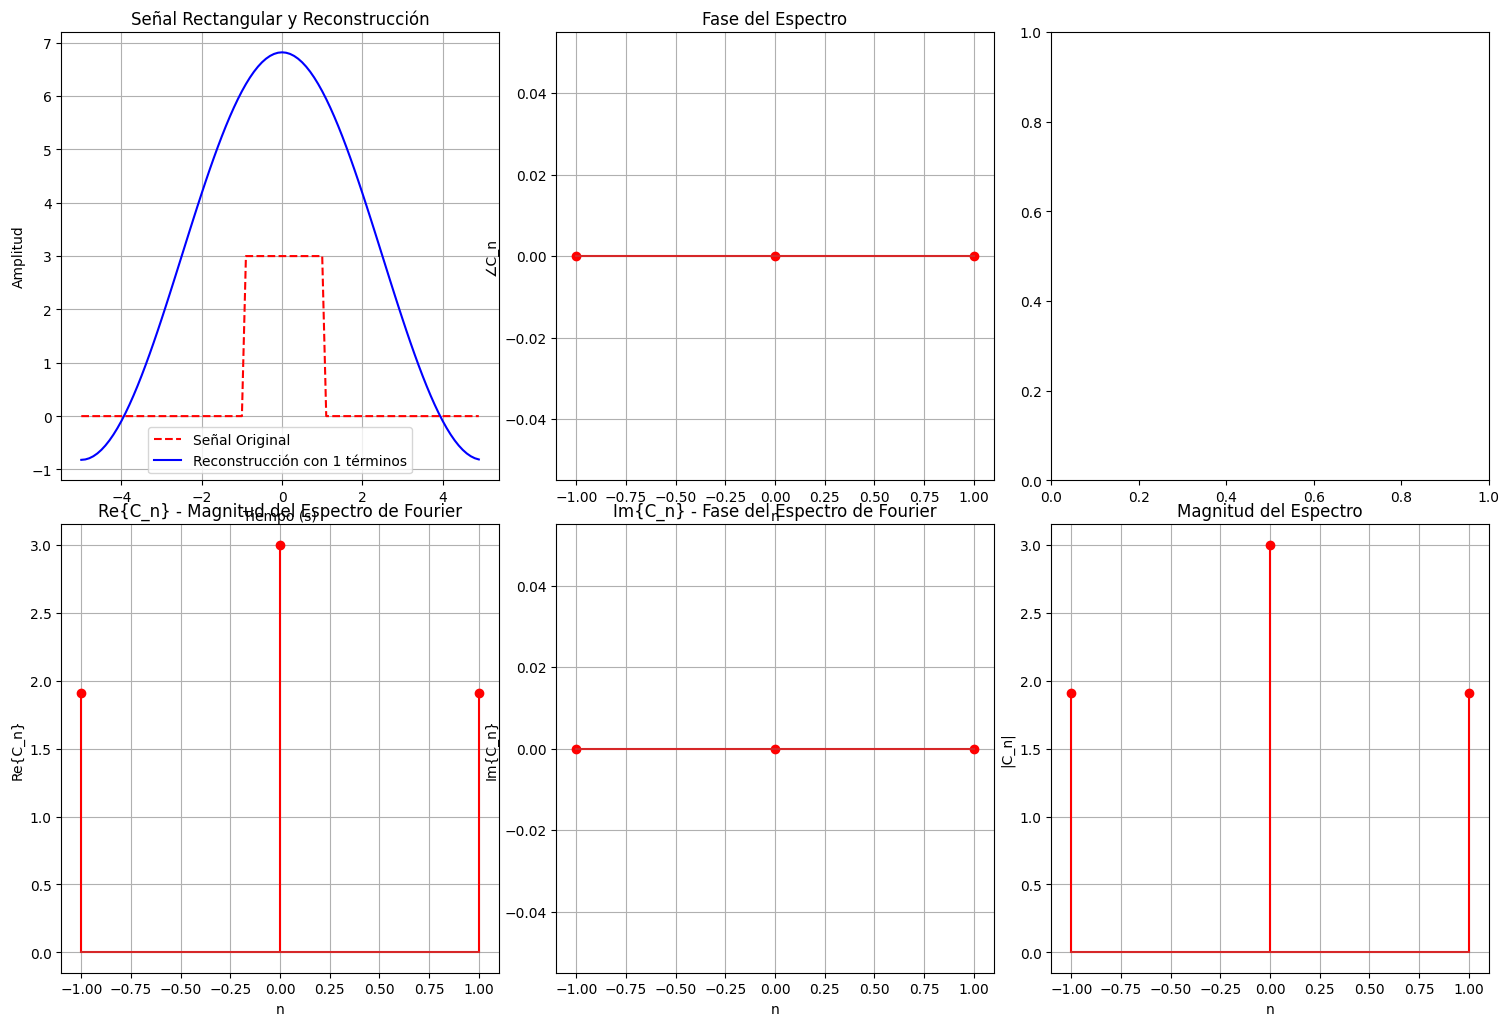

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

# Parámetros de la señal
A = 3  # Amplitud de la señal
tau = 2  # Duración del pulso rectangular
T = 10  # Tiempo total para la gráfica (segundos)
Fo = 1 / T  # Frecuencia fundamental
Fs = 100 * Fo  # Frecuencia de muestreo
tv = np.arange(-T / 2, T / 2, 1 / Fs)  # Vector de tiempo
Nm = len(tv)  # Número de muestras

# Función rectangular
xo = np.zeros(Nm)
xo[(tv >= -tau / 2) & (tv <= tau / 2)] = A

# Coeficientes de Fourier
def fourier_coeffs(n):
    if n == 0:
        return A * tau / 2  # Coeficiente C_0
    return A * tau / (n * np.pi) * np.sin(n * np.pi / 2)  # Coeficiente C_n

# Reconstrucción de la señal usando N términos
def reconstruir(t, N):
    x_reconstruida = np.zeros_like(t, dtype=complex)
    for n in range(-N, N + 1):
        c_n = fourier_coeffs(n)
        x_reconstruida += c_n * np.exp(1j * 2 * np.pi * n * t / T)
    return np.real(x_reconstruida)

# Configuración de la gráfica
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plt.tight_layout()

# Inicializar los objetos de gráficos
stem_lines = [None] * 4

# Animación de la señal y su espectro
def animar(i):
    N = i + 1
    x_reconstruida = reconstruir(tv, N)

    # Actualizar la subgráfica de la señal y su reconstrucción
    axs[0, 0].cla()
    axs[0, 0].plot(tv, xo, 'r--', label='Señal Original')
    axs[0, 0].plot(tv, x_reconstruida, 'b-', label=f'Reconstrucción con {N} términos')
    axs[0, 0].legend()
    axs[0, 0].set_title('Señal Rectangular y Reconstrucción')
    axs[0, 0].set_xlabel('Tiempo (s)')
    axs[0, 0].set_ylabel('Amplitud')
    axs[0, 0].grid()

    # Actualizar el espectro
    nv = np.arange(-N, N + 1)
    Cn = np.array([fourier_coeffs(n) for n in nv])

    # Actualizar gráficos de espectro
    axs[1, 0].cla()
    stem_lines[0] = axs[1, 0].stem(nv, np.real(Cn), 'r')
    axs[1, 0].set_title('Re{C_n} - Magnitud del Espectro de Fourier')
    axs[1, 0].set_xlabel('n')
    axs[1, 0].set_ylabel('Re{C_n}')
    axs[1, 0].grid()

    axs[1, 1].cla()
    stem_lines[1] = axs[1, 1].stem(nv, np.imag(Cn), 'r')
    axs[1, 1].set_title('Im{C_n} - Fase del Espectro de Fourier')
    axs[1, 1].set_xlabel('n')
    axs[1, 1].set_ylabel('Im{C_n}')
    axs[1, 1].grid()

    axs[1, 2].cla()
    stem_lines[2] = axs[1, 2].stem(nv, np.abs(Cn), 'r')
    axs[1, 2].set_title('Magnitud del Espectro')
    axs[1, 2].set_xlabel('n')
    axs[1, 2].set_ylabel('|C_n|')
    axs[1, 2].grid()

    axs[0, 1].cla()
    stem_lines[3] = axs[0, 1].stem(nv, np.angle(Cn), 'r')
    axs[0, 1].set_title('Fase del Espectro')
    axs[0, 1].set_xlabel('n')
    axs[0, 1].set_ylabel('∠C_n')
    axs[0, 1].grid()

# Crear animación
ani = FuncAnimation(fig, animar, frames=50, interval=200, repeat=False)

# Mostrar animación
rc('animation', html='jshtml')
HTML(ani.to_jshtml())
